In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
#input 
kepadatan = ctrl.Antecedent(np.arange(0, 101, 1), 'kepadatan')
waktu = ctrl.Antecedent(np.arange(0, 25, 1), 'waktu')

In [3]:
#output
durasi_lampu_hijau = ctrl.Consequent(np.arange(0, 121, 1), 'durasi_lampu_hijau')

In [4]:
kepadatan['tidak_padat'] = fuzz.trimf(kepadatan.universe, [0, 0, 30])
kepadatan['kurang_padat'] = fuzz.trimf(kepadatan.universe, [20, 30, 50])
kepadatan['cukup_padat'] = fuzz.trimf(kepadatan.universe, [40, 50, 70])
kepadatan['padat'] = fuzz.trimf(kepadatan.universe, [60, 70, 90])
kepadatan['sangat_padat'] = fuzz.trimf(kepadatan.universe, [80, 100, 100])

In [5]:
waktu['pagi'] = fuzz.trimf(waktu.universe, [0, 0, 8])
waktu['siang'] = fuzz.trimf(waktu.universe, [7, 12, 17])
waktu['malam'] = fuzz.trimf(waktu.universe, [16, 24, 24])

In [6]:
durasi_lampu_hijau['pendek'] = fuzz.trimf(durasi_lampu_hijau.universe, [0, 0, 30])
durasi_lampu_hijau['sedang'] = fuzz.trimf(durasi_lampu_hijau.universe, [20, 50, 80])
durasi_lampu_hijau['panjang'] = fuzz.trimf(durasi_lampu_hijau.universe, [60, 120, 120])

In [7]:
rule1 = ctrl.Rule(kepadatan['tidak_padat'] &
                  waktu['malam'], durasi_lampu_hijau['pendek'])
rule2 = ctrl.Rule(kepadatan['kurang_padat'] &
                  waktu['siang'], durasi_lampu_hijau['sedang'])
rule3 = ctrl.Rule(kepadatan['cukup_padat'] &
                  waktu['siang'], durasi_lampu_hijau['panjang'])
rule4 = ctrl.Rule(kepadatan['padat'] | waktu['pagi'], durasi_lampu_hijau['panjang'])
rule5 = ctrl.Rule(kepadatan['sangat_padat'] &
                  waktu['malam'], durasi_lampu_hijau['sedang'])

In [8]:
control_lampu = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
simulasi_lampu = ctrl.ControlSystemSimulation(control_lampu)

Durasi Lampu Hijau: 96.67 detik


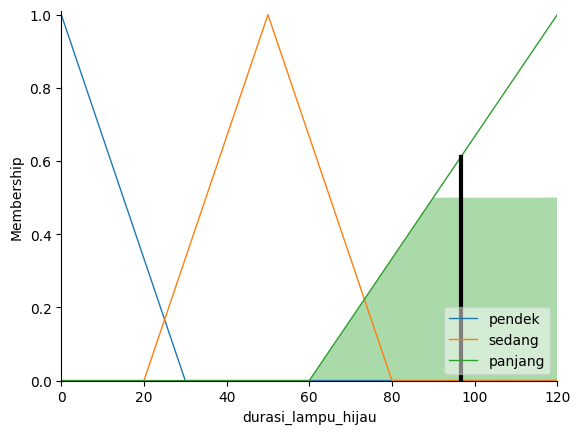

In [10]:
simulasi_lampu.input['kepadatan'] = 80
simulasi_lampu.input['waktu'] = 14 

simulasi_lampu.compute()

# Output
print(
    f"Durasi Lampu Hijau: {simulasi_lampu.output['durasi_lampu_hijau']:.2f} detik")
durasi_lampu_hijau.view(sim=simulasi_lampu)

> Hasil Output : 
- Grafik durasi lampu hijau akan menunjukkan tingkat keanggotaan dari setiap kategori durasi pada sumbu Y.
- Posisi vertikal garis **Oren** menandakan tingkat keanggotaan untuk durasi lampu hijau yang dipilih oleh sistem logika_fuzzy berdasarkan input yang diberikan yaitu<br>
```python
simulasi_lampu.input['kepadatan'] = 80
```
- Semakin tinggi garis Oren, semakin kuat keanggotaan untuk durasi tersebut.

Sehingga dapat disimpulkan bahwa dari hasil grafik diatas menunjukkan bahwa sistem merekomendasikan durasi lampu hijau sedang. Ini mengindikasikan bahwa sistem merekomendasikan durasi lampu hijau yang sedang untuk mengatasi tingkat kepadatan kendaraan yang tinggi pada siang hari.